In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

fnames = glob.glob("data/raw/scale_factors_and_expectation_values*")
print(f"Found {len(fnames)} data files.")

Found 50 data files.


In [3]:
alldata = []
for fname in fnames:
    alldata.append(np.loadtxt(fname))
alldata = np.array(alldata)
alldata = alldata[:,:11,:]
average = np.average(alldata, axis=0)
std = np.std(alldata, axis=0)
_ = plt.errorbar(average[:, 0], average[:, 1], yerr=std[:, 1], lw=2, capsize=10)

In [4]:
alldata.shape

(50, 11, 2)

In [5]:
from mitiq.zne.inference import LinearFactory, RichardsonFactory, PolyFactory, ExpFactory

Let's look at all the different runs at different noise scalings.

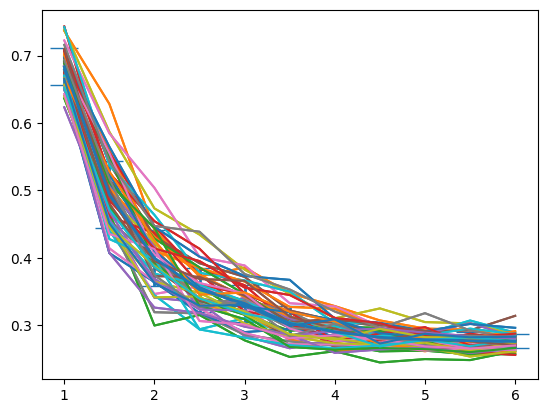

In [7]:
for dd in alldata:
    x, y = dd.T
    plt.plot(x, y)
plt.show()

In [8]:
def input_values(factory, scale_factors, expectation_values):
    for e, s in zip(expectation_values, scale_factors):
        factory.push({"scale_factor": s}, e)

In [9]:
fac = LinearFactory(scale_factors=[1, 2, 3])

In [10]:
input_values(fac, [1, 2, 3], [2, 4, 6])

In [11]:
fac.get_scale_factors()

array([1, 2, 3])

We can then extrapolate out using the different methods.

In [12]:
lins = []
richs = []
polys = []
exps = []
truncs = []
for dd in alldata:
    x, y = dd.T
    
    # linear
    fac = LinearFactory(scale_factors=x)
    input_values(fac, x, y)
    linear = fac.reduce()
    lins.append(linear)
    
    # richardson
    fac = RichardsonFactory(scale_factors=x)
    input_values(fac, x, y)
    rich = fac.reduce()
    richs.append(rich)
    
    # truncated richardson
    fac = RichardsonFactory(scale_factors=x[:3])
    input_values(fac, x[:3], y[:3])
    trunc = fac.reduce()
    truncs.append(trunc)
    
    # poly order 2
    fac = PolyFactory(scale_factors=x, order=2)
    input_values(fac, x, y)
    poly = fac.reduce()
    polys.append(poly)
    
    # exponential
    fac = ExpFactory(scale_factors=x, asymptote=0.25)
    input_values(fac, x, y)
    exp = fac.reduce()
    exps.append(exp)

In [13]:
# import seaborn as sns
# sns.set()

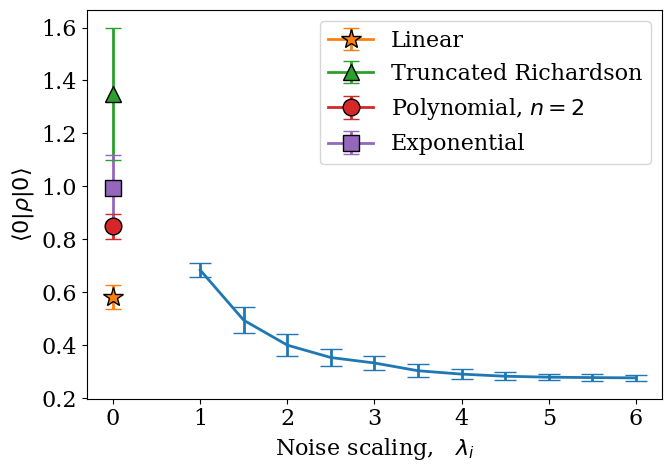

In [17]:
plt.rcParams.update({"font.family": "serif", "font.size": 16})
plt.figure(figsize=(7, 5));

average = np.average(alldata, axis=0)
std = np.std(alldata, axis=0)
_ = plt.errorbar(average[:, 0], average[:, 1], yerr=std[:, 1], lw=2, capsize=8)

_ = plt.errorbar(0, np.mean(lins), yerr=np.std(lins), lw=2, capsize=6, 
             marker="*", markersize=15, markeredgecolor="k", markeredgewidth=1, label=f"Linear")
_ = plt.errorbar(0, np.mean(truncs), yerr=np.std(truncs), lw=2, capsize=6, 
             marker="^", markersize=12, markeredgecolor="k", markeredgewidth=1, label=f"Truncated Richardson")
_ = plt.errorbar(0, np.mean(polys), yerr=np.std(polys), lw=2, capsize=6, 
             marker="o", markersize=12, markeredgecolor="k", markeredgewidth=1, label=f"Polynomial, $n=2$")
_ = plt.errorbar(0, np.mean(exps), yerr=np.std(exps), lw=2, capsize=6, 
             marker="s", markersize=12, markeredgecolor="k", markeredgewidth=1, label=f"Exponential")
_ = plt.legend()

plt.xlabel("Noise scaling,  $\ \lambda_i$");
plt.ylabel(r"$ \langle 0 | \rho | 0 \rangle $");
plt.tight_layout()
#plt.savefig("Figure2a.pdf", format="pdf")
plt.show()
plt.close()

In [18]:
from mitiq import about
about()


Mitiq: A Python toolkit for implementing error mitigation on quantum computers
Authored by: Mitiq team, 2020 & later (https://github.com/unitaryfund/mitiq)

Mitiq Version:	0.10.0dev

Core Dependencies
-----------------
Cirq Version:	0.10.0
NumPy Version:	1.20.3
SciPy Version:	1.4.1

Optional Dependencies
---------------------
PyQuil Version:	2.21.0
Qiskit Version:	None
Braket Version:	1.5.16

Python Version:	3.8.0
Platform Info:	Darwin (x86_64)
